In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Jose Nicolas Rodriguez Montoya
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
def five_point_derivative(f, x, h):
  '''
  Calcula la derivada numerica haciendo uso de la derivada que considera 5 putnos
  Parametros:
    f: funcion  a derivar
    x: Array de puntos donde evaluar la derivada
    h: Paso entre puntos de array x.
  Retorna:
    Array con los valores de la derivada
  '''
  n = len(x)
  fprime = np.zeros_like(x) #array para guardar las derivadas
  for i in range(n):
    #Para cuando la funcion recien arranca, usamos el metodo dirigido hacia adelante
    if i == 0:
      fprime[i] = (-25 * f(x[i]) + 48 * f(x[i]+h) - 36 * f(x[i]+ 2*h) + 16* f(x[i]+ 3*h) - 3* f(x[i]+ h*4)) / (12*h)
    elif i == n-1:
      fprime[i] = (25 * f(x[i]) - 48 * f(x[i]-h) + 36 * f(x[i] - 2*h) - 16* f(x[i ]- 3*h) + 3* f(x[i ]- 4*h)) / (12*h)
    else:
      fprime[i] = (f(x[i ]- 2*h) - 8 *f(x[i ]- h) + 8 * f(x[i ]+ h) - f(x[i ]+ 2*h)) / (12*h)
  return fprime

\El error para un h de 1 es 0.16973730952929544
\El error para un h de 0.5 es 0.008885949301589133
\El error para un h de 0.25 es 0.00031299947808204027
\El error para un h de 0.01 es 3.282870641996283e-10
El error para un h de [0.15094176] en la funcion evaluada en pi/ octavos es [6.21271081e-05]
El error para un h de [0.01130304] en la funcion evaluada en pi/ octavos es [1.30584943e-09]
El error para un h de [0.00055988] en la funcion evaluada en pi/ octavos es [4.73954209e-13]
El error para un h de [7.96070043e-10] en la funcion evaluada en pi/ octavos es [6.27418166e-08]


<ipython-input-2-d1fdaae582a7>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fprime[i] = (-25 * f(x[i]) + 48 * f(x[i]+h) - 36 * f(x[i]+ 2*h) + 16* f(x[i]+ 3*h) - 3* f(x[i]+ h*4)) / (12*h)


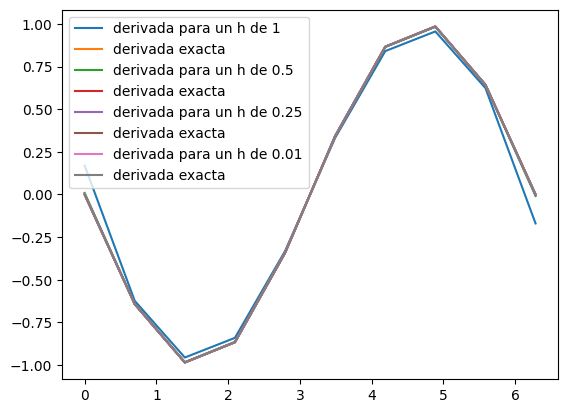

In [ ]:
f = lambda x: np.cos(x)
x = np.linspace(0, 2*np.pi, 10)
h = [ 1, 0.5, 0.25, 0.01]

xt = np.array([np.pi/8])


for i in h:
  fprime = five_point_derivative(f, x, i)
  plt.plot(x, fprime, label = f'derivada para un h de {i}')
  plt.plot(x, -np.sin(x), label = 'derivada exacta')
  print(f'\El error para un h de {i} es {max(abs(fprime - (-np.sin(x))))}')
  plt.legend()

tol = [abs(five_point_derivative(f, xt, i) - (-np.sin(xt))) for i in h]


for i in tol:
  print(f'El error para un h de {i} en la funcion evaluada en pi/ octavos es {abs(five_point_derivative(f, xt, i) - (-np.sin(xt)))}')





In [ ]:
def second_diff(f, x, h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)



el error en el punto pi/8, es 0.00019245886379248844


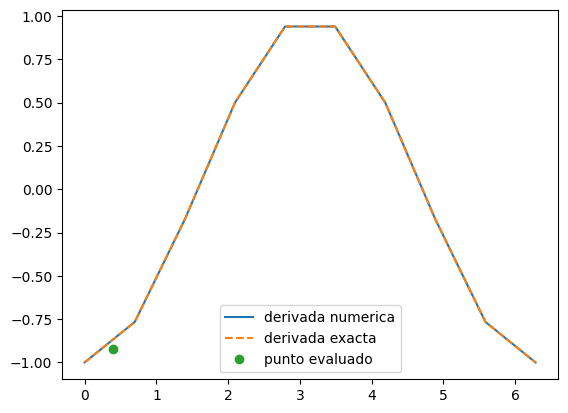

In [ ]:
h = 0.05
f = lambda x: np.cos(x)
x = np.linspace(0, 2*np.pi, 10)

# derivada exacta
fprime2 =lambda x: -np.cos(x)

derivadanum = second_diff(f, x, h)
plt.plot(x, derivadanum, label = 'derivada numerica')
plt.plot(x, fprime2(x),'--', label = 'derivada exacta')
plt.plot(np.pi/8, second_diff(f, np.pi/8, h), 'o', label = 'punto evaluado')
plt.legend()

error = print(f'el error en el punto pi/8, es {abs(second_diff(f, np.pi/8, h) - fprime2(np.pi/8))}')


#Mejora con un H menor, pues hay mas puntos y por lo tanto mayor precision






#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [ ]:
from scipy.interpolate import CubicSpline
def derivada_finita(f, x, h):
  '''
  Calcula la derivada usando diferencias finitas hacia adelante
  f'(x) = [f(x+h)-f(x)]/h
  hacia atras y centradas
  entradas:
    f: funcion numerica
    x: array con los valores a los que les daremos la derivada
    h: float, paso
  salidas:
    fprime = array con la derivada numerica
  '''

  if h == 0:
    raise ValueError("El paso no puede ser cero")

  n = len(x)
  fprime = np.zeros(n)

  for i in range(n):
    if i == 0:
      fprime[i] = (f(x[i] + h) - f(x[i])) / h
    if i == n-1:
      fprime[i] = (f(x[i]) - f(x[i] - h)) / h
    else:
      fprime[i] = (f(x[i]+h) - f(x[i]-h)) / (2*h)

  return fprime



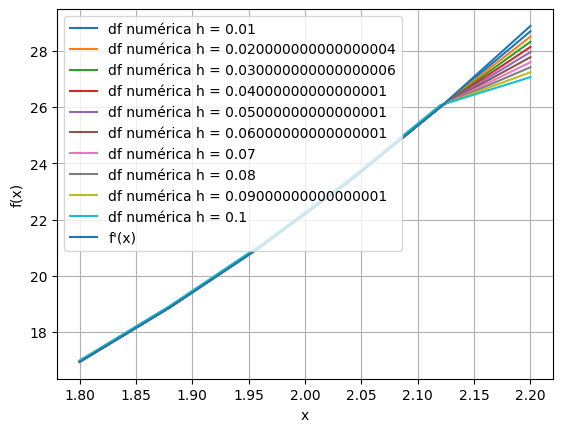

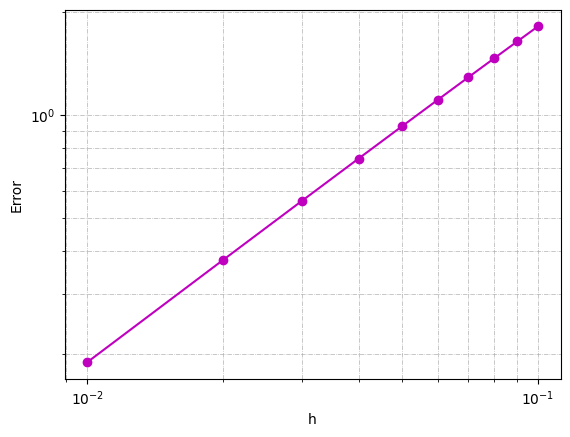

la derivada evaluada en 2 es 22.205070474510812
la segunda derivada evaluada en 2 es 29.554034029833833


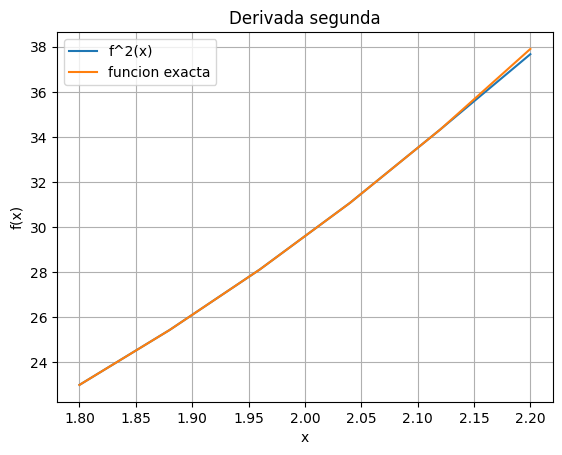

In [ ]:
f = lambda x: x* np.e**x
df = lambda x: (np.e**x)*(x + 1)
x = np.linspace(1.8, 2.2, 6)
h = np.linspace(0.01, 0.1, 10)
error = [] # Guardamos el error
for h_ in h:
  df_approx = derivada_finita(f,x ,h_) # Calculamos diferentes h
  error.append(np.max(np.abs(df(x) - df_approx)))
   # Determinamos el error máximo
  plt.plot(x, df_approx, label=f'df numérica h = {h_}')
plt.plot(x, df(x), label='f\'(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()

# Función de error

plt.figure()
plt.plot(h, error, 'mo-')
plt.semilogx()
plt.semilogy()
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True, which="both", linestyle='-.', linewidth=0.5) # Añadir grid para mejor visualización en log
plt.show()

#Para la segunda derivada pasaremos el valor de la derivada exacta como argumento de la funcion
df2 = derivada_finita(df, x, 0.01)
df2_ex =lambda x: (np.e**x)*(x+2)
plt.plot(x, df2, label='f^2(x)')
plt.plot(x, df2_ex(x), label ='funcion exacta')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Derivada segunda')
plt.legend()
plt.grid()

#Para obtener el valor de la derivada y la segunda derivada evaluados en 2, vamos a interpolar estos puntos

df_interp = CubicSpline(x, df_approx)
df2_interp = CubicSpline(x, df2)

print(f'la derivada evaluada en 2 es {df_interp(2)}')
print(f'la segunda derivada evaluada en 2 es {df2_interp(2)}')




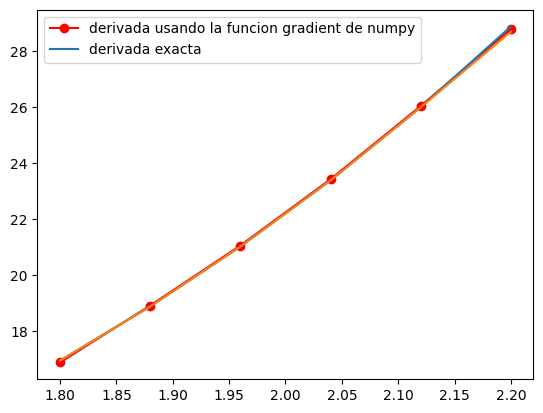

In [ ]:
#implementemos las funciones de scipy y gradient

#primero usamos gradient para el calculo de la derivada
df_gradient = np.gradient(f(x), x, edge_order = 2)
plt.plot()
plt.plot(x, df_gradient, 'ro-', label = 'derivada usando la funcion gradient de numpy')
plt.plot(x, df(x), label = 'derivada exacta')
plt.plot(x, derivada_finita(f, x, 0.01))
plt.legend()
plt.show()


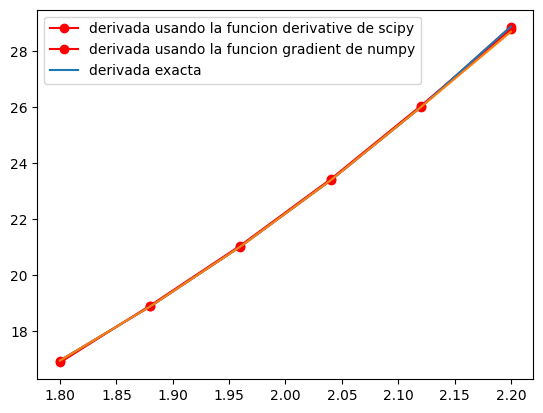

In [ ]:
# Con el scipy usaremos el argumento derivative


f_Cs =CubicSpline(x, f(x))

#Usamos el metodo derivative para conseguir los valores de la derivada de la funcion
df_Cs = f_Cs.derivative(1)
plt.plot(x, df_Cs(x), 'ro-', label = 'derivada usando la funcion derivative de scipy')
#Comparamos con las anteriormente calculadas
plt.plot(x, df_gradient, 'ro-', label = 'derivada usando la funcion gradient de numpy')
plt.plot(x, df(x), label = 'derivada exacta')
plt.plot(x, derivada_finita(f, x, 0.01))
plt.legend()
plt.show()


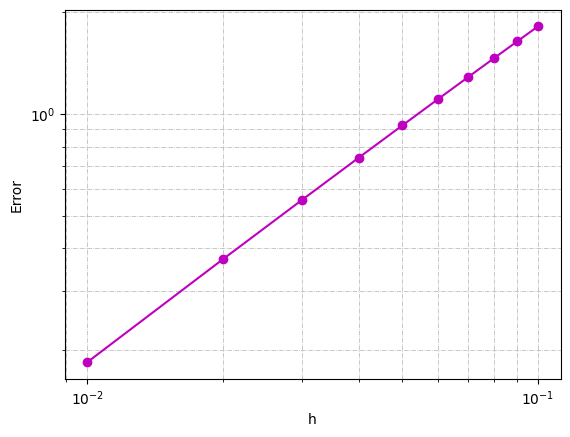

In [ ]:
error = [] # Guardamos el error
for h_ in h:
  df_approx = derivada_finita(f,x ,h_) # Calculamos diferentes h
  error.append(np.max(np.abs(df_Cs(x) - df_approx)))
   # Determinamos el error máximo

plt.figure()
plt.plot(h, error, 'mo-')
plt.semilogx()
plt.semilogy()
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True, which="both", linestyle='-.', linewidth=0.5) # Añadir grid para mejor visualización en log
plt.show()




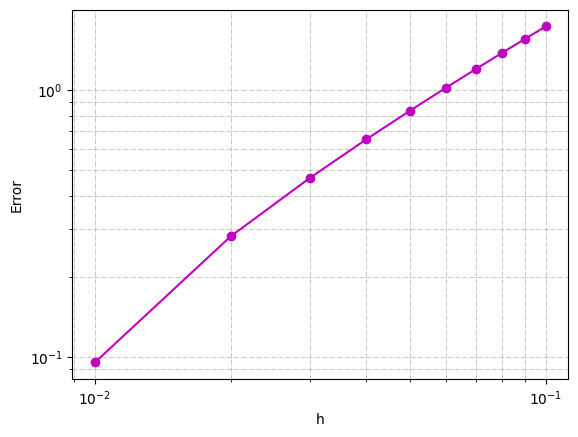

In [ ]:
error = [] # Guardamos el error
for h_ in h:
  df_approx = derivada_finita(f,x ,h_) # Calculamos diferentes h
  error.append(np.max(np.abs(df_gradient - df_approx)))
   # Determinamos el error máximo

plt.figure()
plt.plot(h, error, 'mo-')
plt.semilogx()
plt.semilogy()
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True, which="both", linestyle='-.', linewidth=0.5) # Añadir grid para mejor visualización en log
plt.show()


Parece que en cualesquiera que sea el metodo, el error disminuye cuanto menor sea el tamaño del paso o h
